C:\Users\Workstation\AppData\Local\Temp\ipykernel_9520\1645568706.py:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



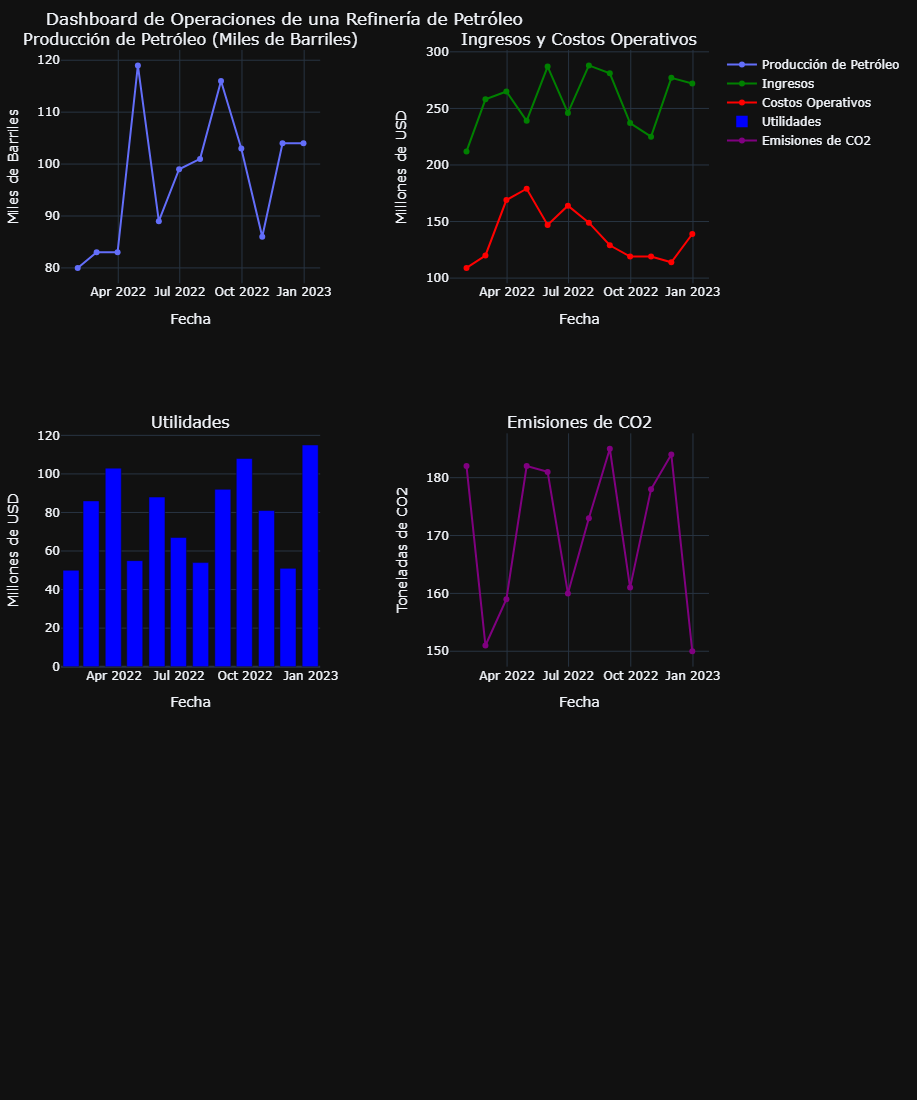

In [19]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.subplots as sp
from plotly import graph_objs as go

# Configuración de Cufflinks para modo offline y de tema
cf.go_offline()
cf.set_config_file(theme='pearl', offline=True)

# Generar datos ficticios
np.random.seed(0)
dates = pd.date_range(start="2022-01-01", end="2023-01-01", freq="M")
data = pd.DataFrame({
    "Fecha": dates,
    "Produccion_petroleo": np.random.randint(80, 120, len(dates)),  # Producción en miles de barriles
    "Ingresos": np.random.randint(200, 300, len(dates)),  # Ingresos en millones de dólares
    "Costos_Operacion": np.random.randint(100, 180, len(dates)),  # Costos en millones de dólares
    "Emisiones_CO2": np.random.randint(150, 200, len(dates)),  # Emisiones en toneladas
    "Utilidades": np.random.randint(50, 120, len(dates))  # Utilidades en millones de dólares
})
data.set_index("Fecha", inplace=True)

# Crear subplots para el dashboard
fig = sp.make_subplots(
    rows=3, cols=2, 
    subplot_titles=(
        "Producción de Petróleo (Miles de Barriles)", 
        "Ingresos y Costos Operativos",
        "Utilidades", 
        "Emisiones de CO2"
    ),
    vertical_spacing=0.15,  # Espaciado vertical entre subplots
    horizontal_spacing=0.20,  # Espaciado horizontal entre subplots
)

# Gráfico 1: Producción de petróleo
fig.add_trace(go.Scatter(x=data.index, y=data["Produccion_petroleo"], mode='lines+markers', name="Producción de Petróleo"),
              row=1, col=1)

# Gráfico 2: Ingresos y Costos Operativos
fig.add_trace(go.Scatter(x=data.index, y=data["Ingresos"], mode='lines+markers', name="Ingresos", line=dict(color='green')),
              row=1, col=2)
fig.add_trace(go.Scatter(x=data.index, y=data["Costos_Operacion"], mode='lines+markers', name="Costos Operativos", line=dict(color='red')),
              row=1, col=2)

# Gráfico 3: Utilidades
fig.add_trace(go.Bar(x=data.index, y=data["Utilidades"], name="Utilidades", marker=dict(color='blue')),
              row=2, col=1)

# Gráfico 4: Emisiones de CO2
fig.add_trace(go.Scatter(x=data.index, y=data["Emisiones_CO2"], mode='lines+markers', name="Emisiones de CO2", line=dict(color='purple')),
              row=2, col=2)

# Ajustar layout del dashboard
fig.update_layout(
    title="Dashboard de Operaciones de una Refinería de Petróleo",
    height=900,  # Aumenta el tamaño para más espacio
    width=1400,  # Aumenta el ancho para más espacio
    showlegend=True, 
    template="plotly_dark",
    margin=dict(l=50, r=50, t=50, b=50)  # Márgenes
)

fig.update_xaxes(title_text="Fecha", row=1, col=1)
fig.update_yaxes(title_text="Miles de Barriles", row=1, col=1)
fig.update_xaxes(title_text="Fecha", row=1, col=2)
fig.update_yaxes(title_text="Millones de USD", row=1, col=2)
fig.update_xaxes(title_text="Fecha", row=2, col=1)
fig.update_yaxes(title_text="Millones de USD", row=2, col=1)
fig.update_xaxes(title_text="Fecha", row=2, col=2)
fig.update_yaxes(title_text="Toneladas de CO2", row=2, col=2)

# Mostrar el dashboard
fig.show()